In [18]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", ""]

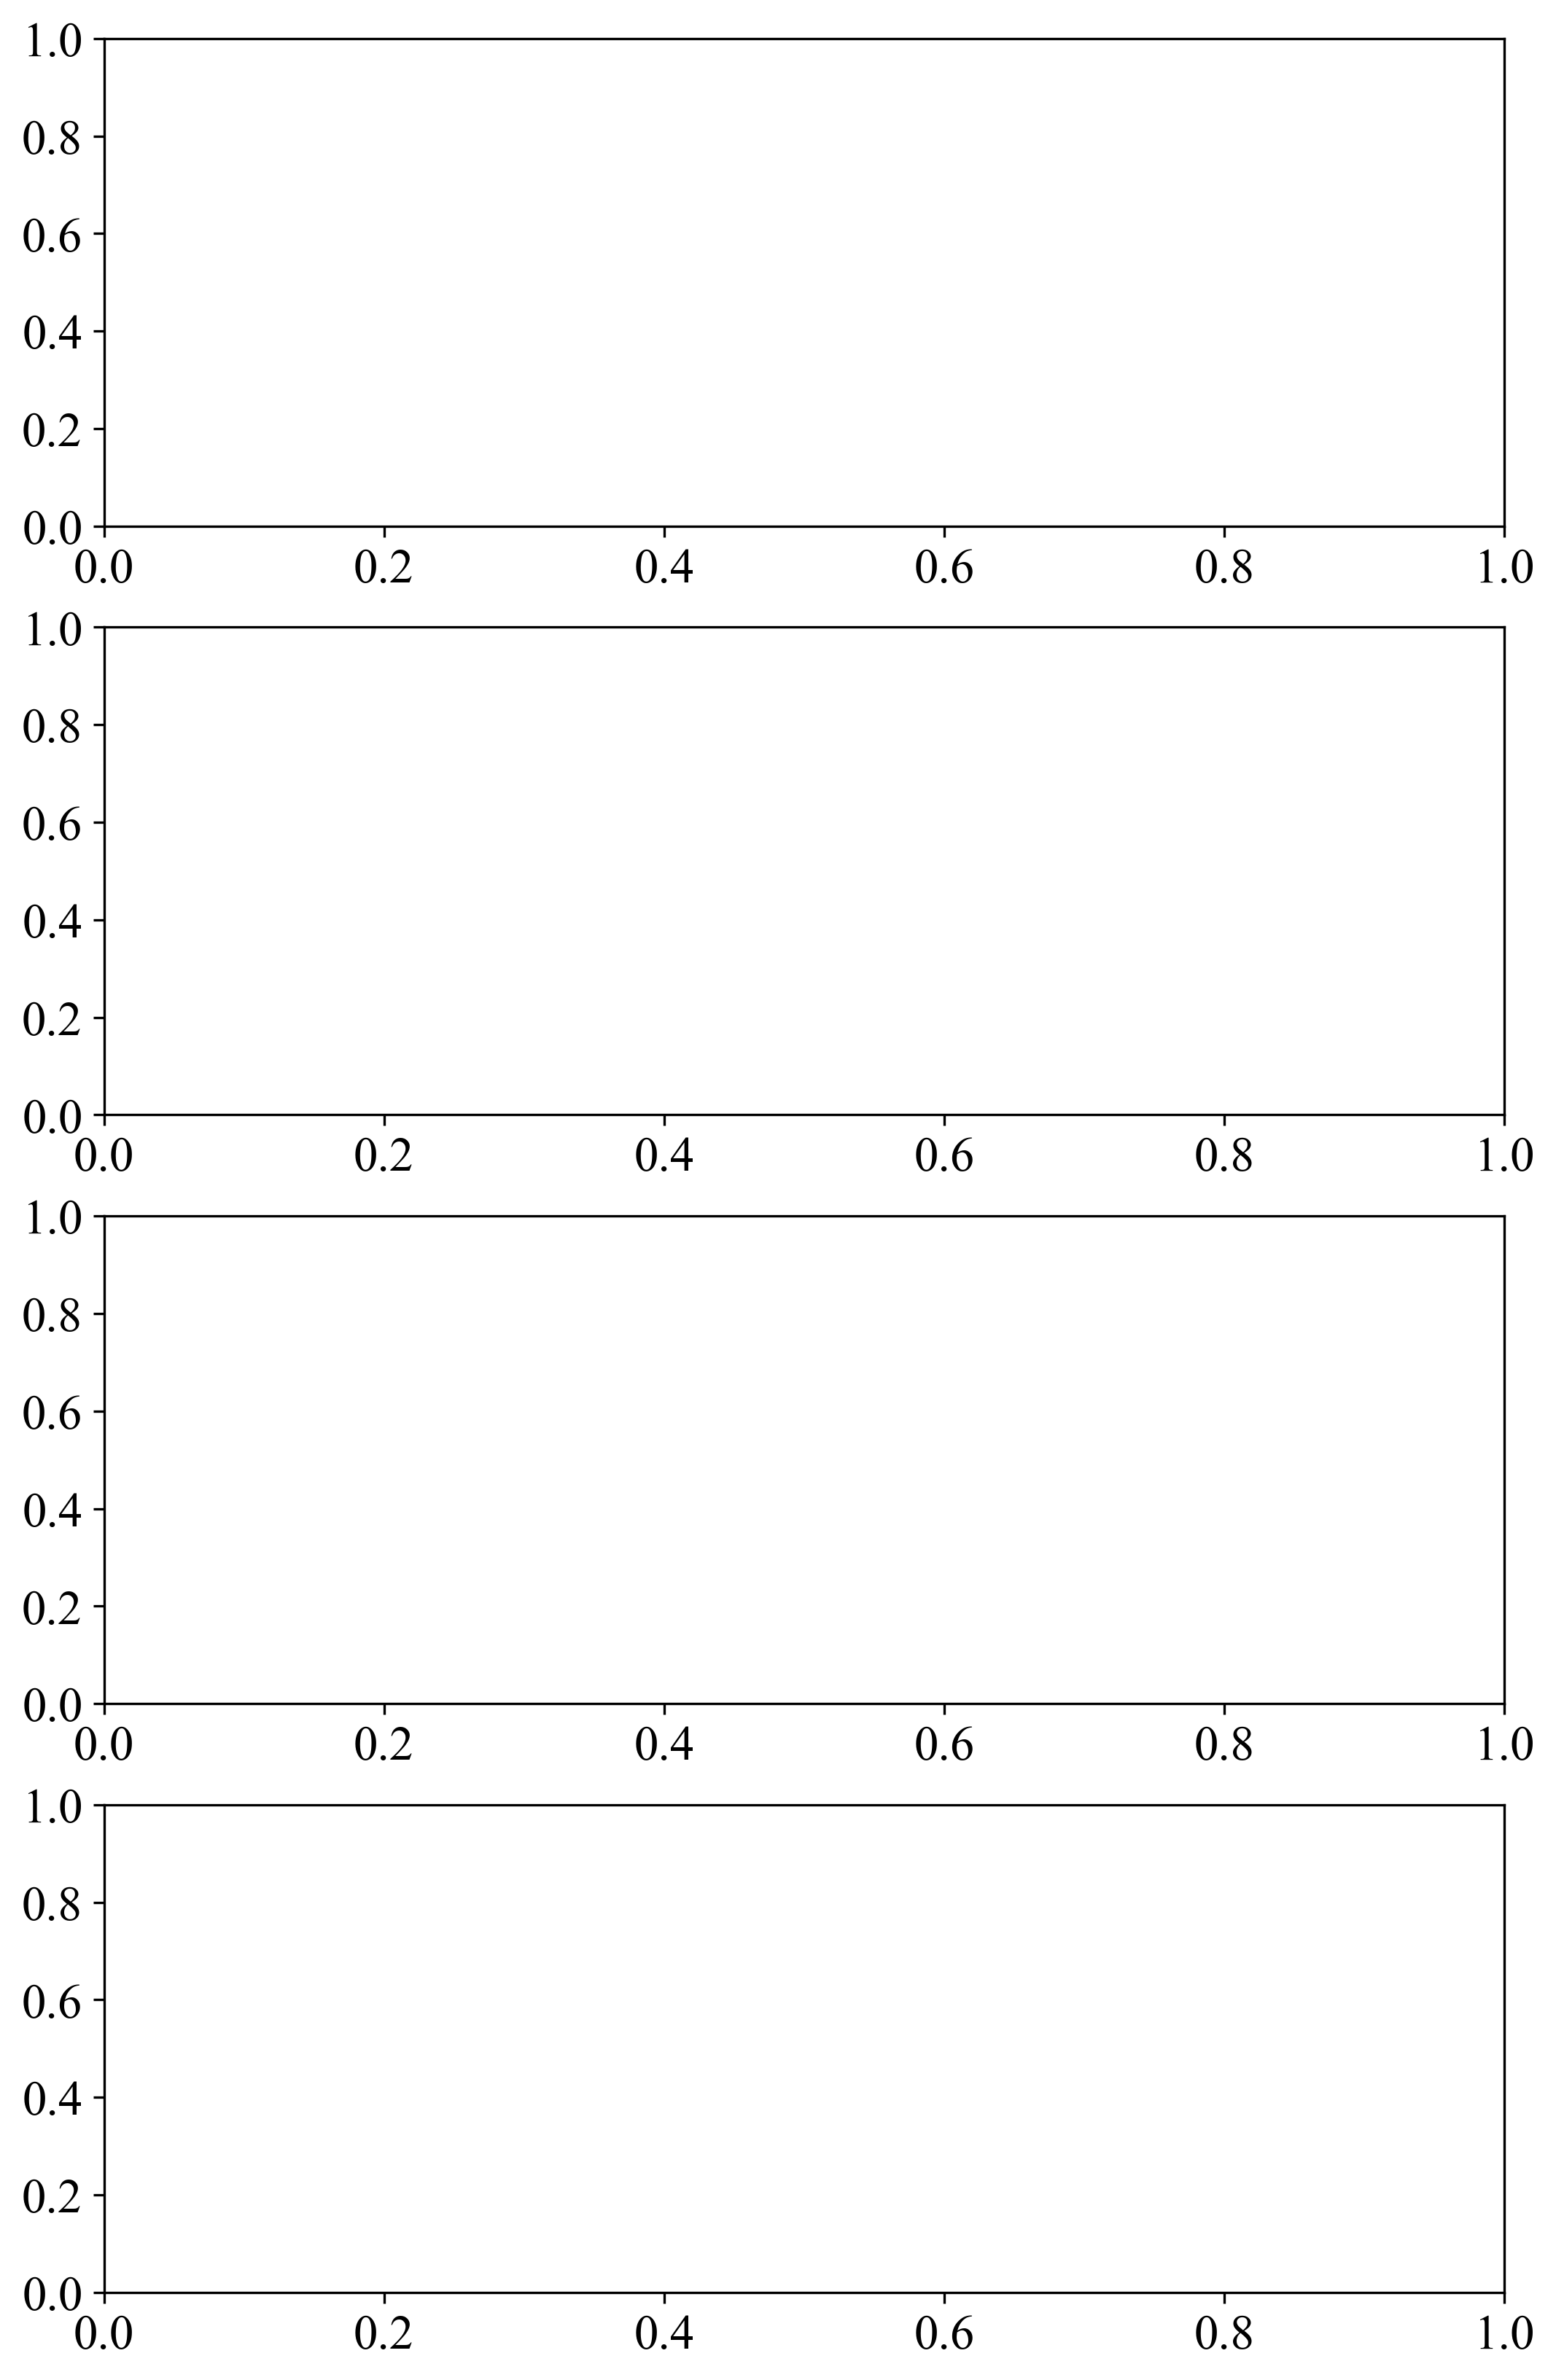

In [19]:
fig, ax = plt.subplots(
    figsize=(7, 14 / 1.3), ncols=1, nrows=4, constrained_layout=True, dpi=300
)

In [20]:
labels_name = [
    "ModelA\n8DP",
    "ModelA\n8TP",
    "ModelB\n8TP",
    "ModelC\n8DP",
    "ModelC\n8TP",
    "ModelD\n8TP",
    "ModelA\n16DP",
    "ModelA\n16TP",
    "ModelB\n16TP",
    "ModelC\n16DP",
    "ModelC\n16TP",
    "ModelD\n16TP",
]

In [21]:
# MFU
data_a = {
    labels_name[0]: [41, 34, 44],  # 22.64
    labels_name[1]: [26, 36, 43],  # 22.64
    labels_name[2]: [30, 39, 49],  # 37
    labels_name[3]: [0, 0, 0],  # 37
    labels_name[4]: [0, 0, 0],  # 22.64
    labels_name[5]: [0, 0, 0],  # 22.64
    labels_name[6]: [0, 0, 0],  # 37
    labels_name[7]: [0, 0, 0],  # 22.64
    labels_name[8]: [0, 0, 0],  # 22.64
    labels_name[9]: [0, 0, 0],  # 37
    labels_name[10]: [0, 0, 0],  # 22.64
    labels_name[11]: [0, 0, 0],  # 22.64
}

In [22]:
# peak memory
data_d = {
    labels_name[0]: [79, 41, 48],
    labels_name[1]: [47, 44, 42],
    labels_name[2]: [66, 60, 69],
    labels_name[3]: [0, 0, 0],
    labels_name[4]: [0, 0, 0],
    labels_name[5]: [0, 0, 0],
    labels_name[6]: [0, 0, 0],  # 37
    labels_name[7]: [0, 0, 0],  # 22.64
    labels_name[8]: [0, 0, 0],  # 22.64
    labels_name[9]: [0, 0, 0],  # 37
    labels_name[10]: [0, 0, 0],  # 22.64
    labels_name[11]: [0, 0, 0],  # 22.64
}

In [23]:
# overlapping rate
data_b = {
    labels_name[0]: [0, 0, 0],
    labels_name[1]: [0, 0, 0],
    labels_name[2]: [0, 0, 0],
    labels_name[3]: [0, 0, 0],
    labels_name[4]: [0, 0, 0],
    labels_name[5]: [0, 0, 0],
    labels_name[6]: [0, 0, 0],  # 37
    labels_name[7]: [0, 0, 0],  # 22.64
    labels_name[8]: [0, 0, 0],  # 22.64
    labels_name[9]: [0, 0, 0],  # 37
    labels_name[10]: [0, 0, 0],  # 22.64
    labels_name[11]: [0, 0, 0],  # 22.64
}

In [24]:
# communication baseline
data_c = {
    labels_name[0]: 70,
    labels_name[1]: 70,
    labels_name[2]: 70,
    labels_name[3]: 70,
    labels_name[4]: 70,
    labels_name[5]: 70,
    labels_name[6]: [0, 0, 0],  # 37
    labels_name[7]: [0, 0, 0],  # 22.64
    labels_name[8]: [0, 0, 0],  # 22.64
    labels_name[9]: [0, 0, 0],  # 37
    labels_name[10]: [0, 0, 0],  # 22.64
    labels_name[11]: [0, 0, 0],  # 22.64
}

In [25]:
# compilation time
data_e = {
    labels_name[0]: [1, 10, 147],
    labels_name[1]: [0, 10, 133],
    labels_name[2]: [0, 0, 0],
    labels_name[3]: [0, 0, 0],
    labels_name[4]: [0, 0, 0],
    labels_name[5]: [0, 0, 0],
    labels_name[6]: [0, 0, 0],  # 37
    labels_name[7]: [0, 0, 0],  # 22.64
    labels_name[8]: [0, 0, 0],  # 22.64
    labels_name[9]: [0, 0, 0],  # 37
    labels_name[10]: [0, 0, 0],  # 22.64
    labels_name[11]: [0, 0, 0],  # 22.64
}

In [26]:
legend_labels = ["Megatron-LM", "XLA", "DLRover-Lynx"]

In [27]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

for x_label, y_data in data_a.items():
    group_positions[x_label] = []
    for i in range(len(y_data)):
        group_positions[x_label].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for x_label, positions in group_positions.items():
    group_centers[x_label] = sum(positions) / len(positions)

In [28]:
label_set = set()
for x_label, y_data in data_a.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)
        ax[0].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax[0].set_xticks(list(group_centers.values()))
ax[0].set_xticklabels(list(data_a.keys()))

ax[0].set_ylim(0, 100)
ax[0].set_yticks([0, 50, 100])
ax[0].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[0].tick_params(axis="x", bottom=False, labelsize=8, pad=1)
ax[0].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[0].set_ylabel("MFU (%)", fontsize=g_label_fontsize)
ax[0].set_title("(a)")

Text(0.5, 1.0, '(a)')

In [29]:
for x_label, y_data in data_d.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, edgecolor, hatch) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
        )
    ):
        ax[1].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor=edgecolor,
            hatch=hatch,
            label=local_label,
        )


ax[1].set_xticks(list(group_centers.values()))
ax[1].set_xticklabels(list(data_a.keys()))

ax[1].set_ylim(0, 90)
ax[1].set_yticks([0, 40, 80])
ax[1].set_yticklabels(["0", "40", "80"], rotation=90, ha="center", va="center")

ax[1].tick_params(axis="x", bottom=False, labelsize=8, pad=1)
ax[1].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[1].set_ylabel("Peak Memory (GB)", fontsize=g_label_fontsize)
ax[1].set_title("(b)")

Text(0.5, 1.0, '(b)')

In [30]:
label_set = set()
total_label = "Non-Overlap Communication"

for x_label, y_data in data_b.items():
    positions = group_positions[x_label]
    for i, (pos, value, diff_value, color, edgecolor, label, hatch) in enumerate(
        zip(
            positions,
            y_data,
            list(data_c.values()),
            colors,
            edgecolors,
            legend_labels,
            hatches,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)

        ax[2].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor=edgecolor,
            hatch=hatch,
            #label=local_label,
        )

        ax[2].bar(
            pos,
            diff_value - value,
            bottom=value,
            color="#E3E3E3",
            edgecolor=edgecolor,
            width=bar_width,
            label=total_label,
        )
        if total_label is not None:
            total_label = None

ax[2].set_xticks(list(group_centers.values()))
ax[2].set_xticklabels(list(data_a.keys()))

ax[2].set_ylim(0, 100)
ax[2].set_yticks([0, 50, 100])
ax[2].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[2].tick_params(axis="x", bottom=False, labelsize=8, pad=1)
ax[2].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[2].set_ylabel("Comm-Comp Overlap Ratio (%)", fontsize=g_label_fontsize)
ax[2].set_title("(c)")

Text(0.5, 1.0, '(c)')

In [31]:
for x_label, y_data in data_e.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, edgecolor, hatch) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
        )
    ):
        ax[3].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor=edgecolor,
            hatch=hatch,
            label=local_label,
        )


ax[3].set_xticks(list(group_centers.values()))
ax[3].set_xticklabels(list(data_a.keys()))

ax[3].set_ylim(0, 210)
ax[3].set_yticks([0, 50, 100, 150, 200])
ax[3].set_yticklabels(["0", "50", "100", "150", "200"], rotation=90, ha="center", va="center")

ax[3].tick_params(axis="x", bottom=False, labelsize=8, pad=1)
ax[3].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[3].set_ylabel("Compile Time (s)", fontsize=g_label_fontsize)
ax[3].set_title("(d)")

Text(0.5, 1.0, '(d)')

In [32]:
ax[0].legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    fontsize=g_label_fontsize,
)

ax[2].legend(
    ncol=1,
    loc="upper center",
    frameon=False,
    shadow=False,
    fontsize=g_label_fontsize,
)

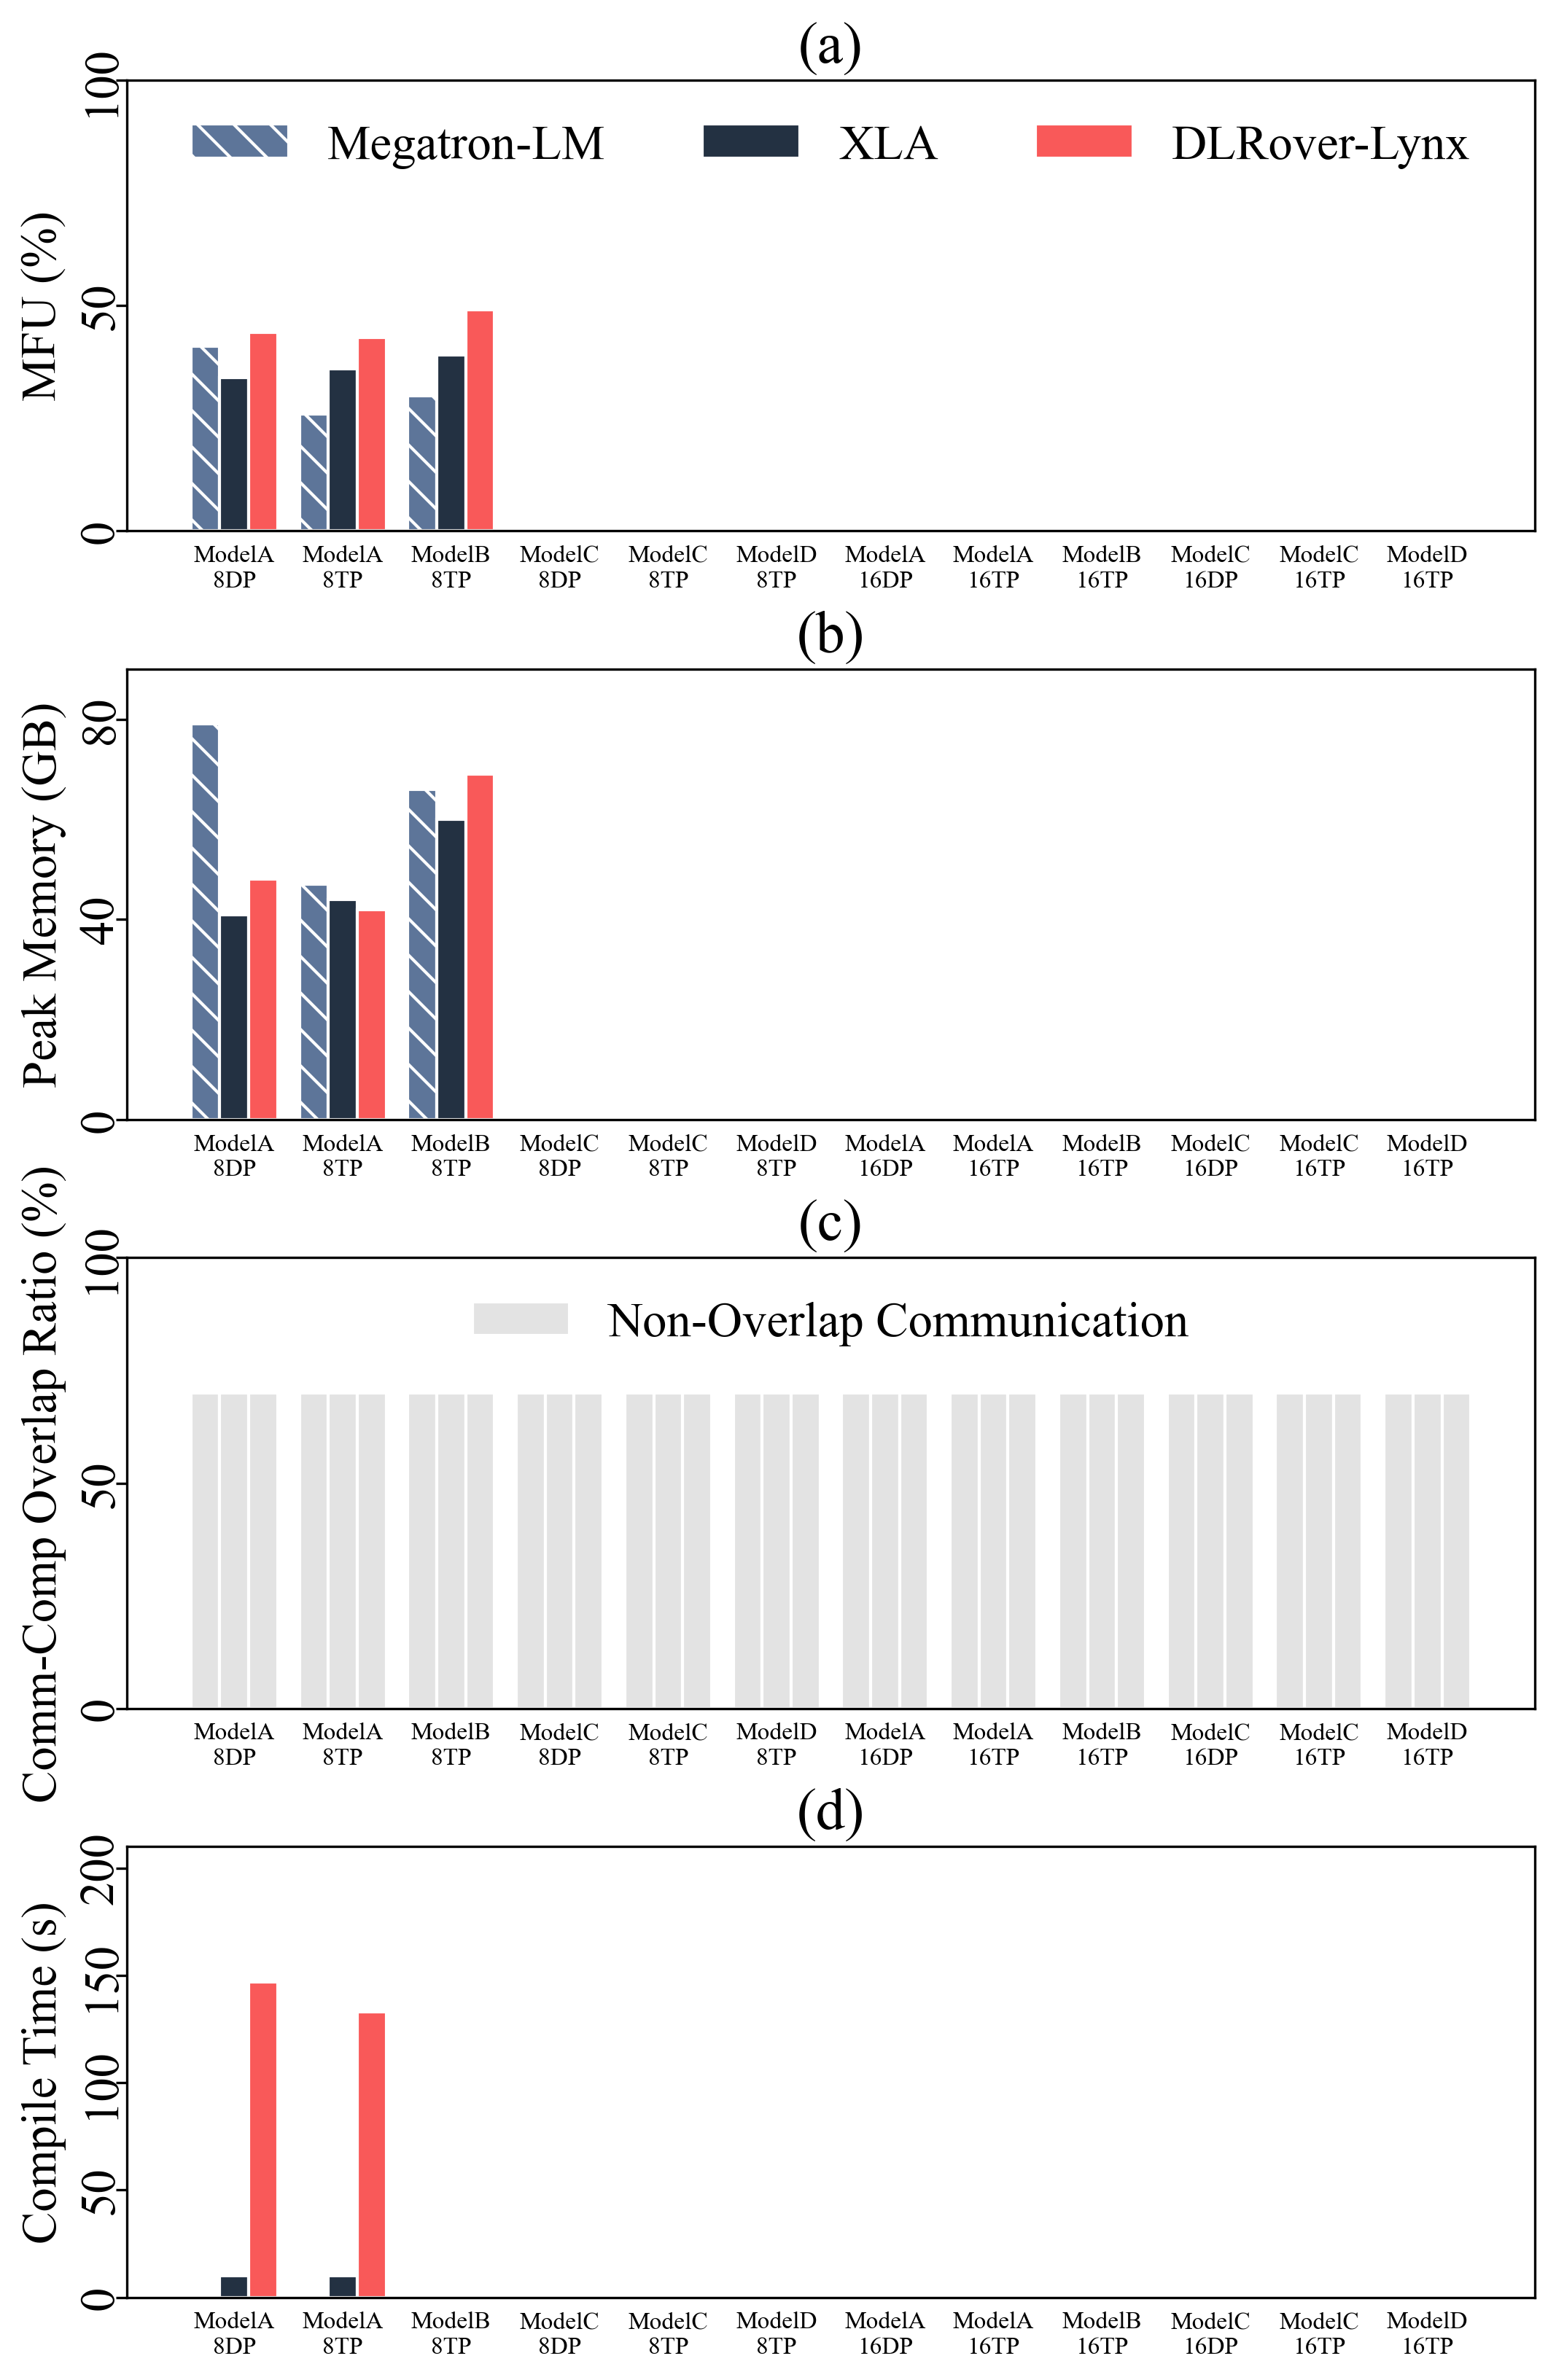

In [33]:
fig.savefig("end_to_end_single.pdf", bbox_inches="tight", dpi=1000)
fig